In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set()
pd.set_option('display.max_rows', None)

In [29]:
dictionary_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/dictionary_results.csv')
generator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/generator_results.csv')
iterator_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/iterator_results.csv')
list_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/list_results.csv')
set_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/set_results.csv')
tuple_results = pd.read_csv('C:/code/projects/master-thesis/doc/results/timer/tuple_results.csv')

In [30]:
tuple_results

,function,time,version
0,tuple_append_10000,0.971000,2.7.18
1,tuple_sort_10000,0.002000,2.7.18
2,tuple_append_50000,36.763000,2.7.18
3,tuple_sort_50000,0.011000,2.7.18
4,tuple_append_100000,221.636000,2.7.18
5,tuple_sort_100000,0.027000,2.7.18
6,tuple_append_10000,0.231000,3.0.1
7,tuple_sort_10000,0.004000,3.0.1
8,tuple_append_50000,6.373000,3.0.1
9,tuple_sort_50000,0.016000,3.0.1


<Axes: xlabel='version'>

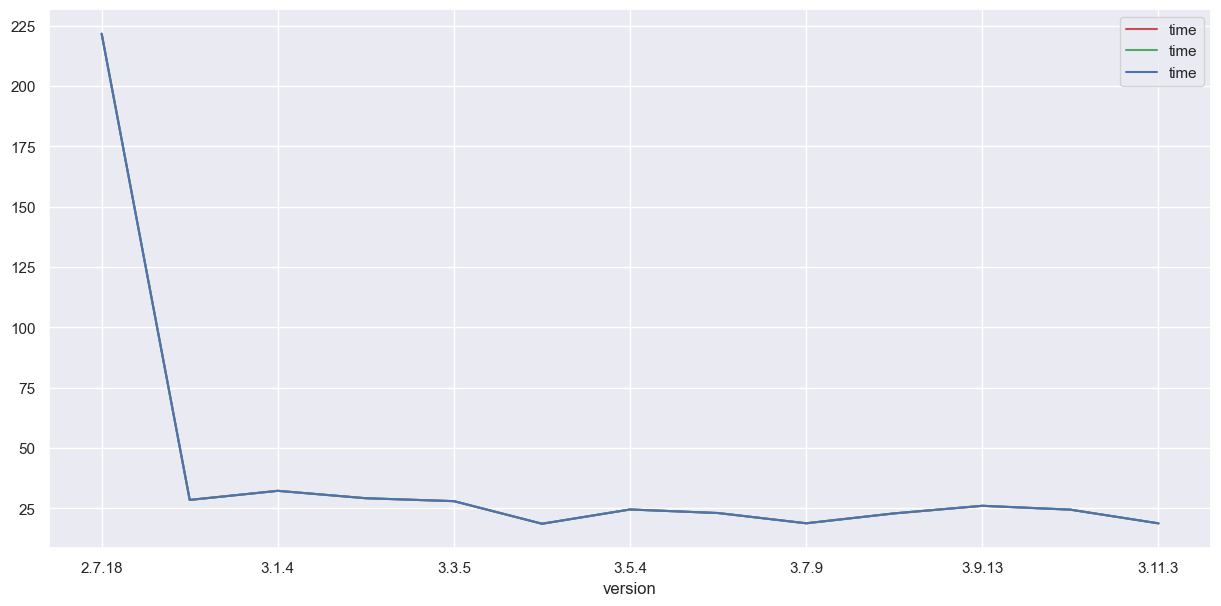

In [31]:
_, ax = plt.subplots(figsize=(15,7))

tuple_results.loc[tuple_results.function == 'tuple_append_100000'].plot(x='version', y='time', ax=ax, c='r')
tuple_results.loc[tuple_results.function == 'tuple_append_100000'].plot(x='version', y='time', ax=ax, c='g')
tuple_results.loc[tuple_results.function == 'tuple_append_100000'].plot(x='version', y='time', ax=ax, c='b')

In [78]:
tuple_new = pd.read_csv('C:/code/projects/master-thesis/doc/results/tuple_results.csv')
tuple_new

,datetime,function,amount,time_seconds,version
0,2023-05-04 21:37:19,tuple_append,100000,23.642,2.7.18
1,2023-05-04 21:37:19,tuple_sort,100000,0.026,2.7.18
2,2023-05-04 21:37:19,tuple_append,100000,28.203,2.7.18
3,2023-05-04 21:37:19,tuple_sort,100000,0.021,2.7.18
4,2023-05-04 21:37:19,tuple_append,100000,26.038,2.7.18
5,2023-05-04 21:37:19,tuple_sort,100000,0.025,2.7.18
6,2023-05-04 21:37:19,tuple_append,100000,20.106,2.7.18
7,2023-05-04 21:37:19,tuple_sort,100000,0.021,2.7.18
8,2023-05-04 21:37:19,tuple_append,100000,19.938,2.7.18
9,2023-05-04 21:37:19,tuple_sort,100000,0.030,2.7.18


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.7.18
3.0.1


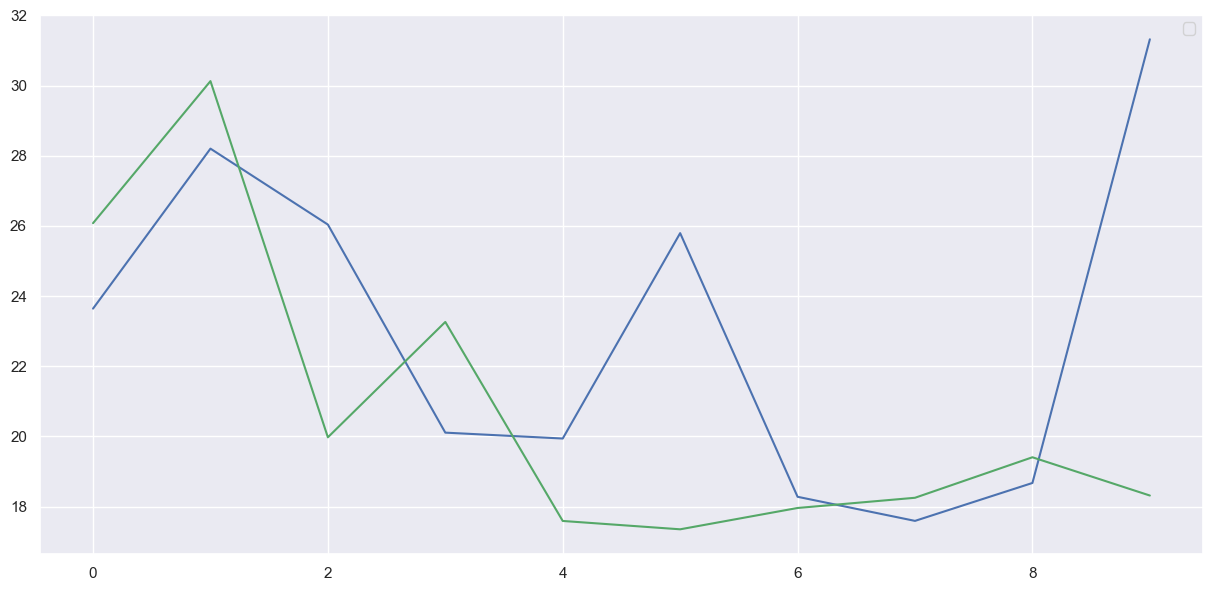

In [80]:
import numpy as np
import matplotlib.colors as mcolors

colors = list(mcolors.BASE_COLORS)
versions = tuple_new.version.str.split(';\s*', expand=True).stack().unique()

_, ax = plt.subplots(figsize=(15,7))

for i, v in enumerate(versions):
    print(v)
    y = tuple_new.loc[(tuple_new.function == 'tuple_append') & (tuple_new.version == v)]
    ax.plot(np.arange(len(y)), y.time_seconds, c=colors[i])

plt.legend()

In [81]:
tuple_new.loc[(tuple_new.function == 'tuple_append') & (tuple_new.version == '3.0.1')]

,datetime,function,amount,time_seconds,version
20,2023-05-04 22:58:06,tuple_append,100000,26.078,3.0.1
22,2023-05-04 22:58:33,tuple_append,100000,30.128,3.0.1
24,2023-05-04 22:59:03,tuple_append,100000,19.973,3.0.1
26,2023-05-04 22:59:23,tuple_append,100000,23.262,3.0.1
28,2023-05-04 22:59:46,tuple_append,100000,17.588,3.0.1
30,2023-05-04 23:00:04,tuple_append,100000,17.350,3.0.1
32,2023-05-04 23:00:21,tuple_append,100000,17.958,3.0.1
34,2023-05-04 23:00:39,tuple_append,100000,18.249,3.0.1
36,2023-05-04 23:00:57,tuple_append,100000,19.404,3.0.1
38,2023-05-04 23:01:17,tuple_append,100000,18.313,3.0.1


In [64]:
for v in list(tuple_new.version):
    print(repr(v))

'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'2.7.18'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'
'3.0.1'


In [65]:
tuple_new.version.str.split(';\s*', expand=True).stack().unique()

array(['2.7.18', '3.0.1'], dtype=object)